## “ How has the Covid-19 pandemic influenced the suicide rate in the USA? “

It is clear that Covid-19 had a big impact on increasing the mental health of US citizens [7].  Over a 19.3% increase in the number of people suffering from mental health has appeared after the pandemic [9]. Suicide is one of the most serious outcomes of mental illness. What is more other studies have shown that the suicide rate has increased due to the COVID-19 pandemic [8]. Because of this reason, we want to analyze if indeed we can see an influence of the pandemic and if there is a gender or race which is more affected by these events. In this report, our main aim is to understand and analyze:

“ How has the Covid-19 pandemic influenced the suicide rate in the USA? “

In order to answer these questions we are taking into account different factors such as Age, Gender, and Race which could not only show a difference in numbers before and after the pandemic but also if there are specific groups that are more affected.For this, we take into account answering questions sated in the raport of our group. 

To be able to answer all of the research questions, we used datastest from the following sources 
(HERE PUT LINKS TO DATASETS THAT WE USED)

Link: a bit of explanaiton 

Link: a bit of explanaiton 

Link: a bit of explanaiton 

By using those datasets, we aim to understand hwo the COVID-19 pandemic has influanced suicide rates, discerning whether specific demographic groups or genders, have been disproportionately affected. Data preparation, which includes cleaning, consolidating, and organizing data from relevant sources, is a crucial step in ensuring the reliability and accuracy of our analysis. All the steps can be found below 


In [1]:
# Necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 


### The Funtion to Process file_2014_name and file_2020_name
Function is designed to porcess suicide data from two separate CSV files, one cotaining data from 2014 - 2019, the other one from 2020 - 2023. Sice the year 2023 was lacking most of the moths, for simplicity we decided that the best thing would be to drop that information. The function returns a DataFrame with two columns, 'Year' and 'Suicides', where 'Suicides' represents the total number of suicides recorded for each year across both datasets. This function simplifies the process of analyzing suicide trends over time by consolidating and cleaning the data from different sources.

In [2]:
def process_suicide_data(file_name_2014, file_name_2020):
    try:
        # Construct file paths based on the current working directory
        current_dir = os.getcwd()
        file_path_2014_2019 = os.path.join(current_dir, 'data', file_name_2014)
        file_path_2020_2023 = os.path.join(current_dir, 'data', file_name_2020)

        # Load datasets
        data2014 = pd.read_csv(file_path_2014_2019)
        data2020 = pd.read_csv(file_path_2020_2023)
        
        # Identify columns related to suicide
        suicide_col_2014_2019 = [col for col in data2014.columns if 'suicide' in col.lower() or 'self-harm' in col.lower()]
        suicide_col_2020_2023 = "Intentional Self-Harm (Suicide)"
        suicide_col_2014_2019 = suicide_col_2014_2019[0] if suicide_col_2014_2019 else None

        # Selecting relevant columns 
        columns_to_select = ['Year', 'Month', suicide_col_2014_2019] if suicide_col_2014_2019 else ['Year', 'Month']
        data_2014_2019_selected = data2014[columns_to_select]
        data_2020_2023_selected = data2020[['Year', 'Month', suicide_col_2020_2023]]

        # Renaming columns for consistency
        data_2014_2019_selected.rename(columns={suicide_col_2014_2019: 'Suicides'}, inplace=True)
        data_2020_2023_selected.rename(columns={suicide_col_2020_2023: 'Suicides'}, inplace=True)

        # Combine and clean data
        combined_data = pd.concat([data_2014_2019_selected, data_2020_2023_selected])
        combined_data.dropna(subset=['Suicides'], inplace=True)

        # Group by Year and sum the Suicides
        annual_suicides = combined_data.groupby('Year')['Suicides'].sum().reset_index()
        return annual_suicides
    except Exception as e: 
        print(f"An error occured: {e}")

### The Funtion process_detailed_suicide_data explanation

This function is made to analyze a deteailed suicide dataset contained in a CSV file. It focuses on processing and extracting specific insights related to gender and ethinicty within the context of suicide data. The function returns two DataFrames: one suamrrizing gender related suicide data and another summarizing ethinicty related suicide data, both aggregated by year. This approach allows for a detailed analyasys of suicide trends across different genders and ethinicty over time, providing valuable insighs and changes based on different years.

In [3]:

def process_detailed_suicide_data(file_path):
    # Read the CSV file
    current_dir = os.getcwd()
    file_path_detailed = os.path.join(current_dir, 'data', file_path)
    data = pd.read_csv(file_path_detailed)

    # Filter for intentional self-harm (suicide)
    suicide_filter = 'Intentional self-harm (suicide)'  
    suicide_data = data[data['Cause_Desc'] == suicide_filter]

    # Select relevant rows
    columns_of_interest = ['Year', 'Strata', 'Strata_Name', 'Count']
    suicide_data_selected = suicide_data[columns_of_interest]
    
    return suicide_data_selected

In [4]:
def chuj(file_path):
    # Read the CSV file
    current_dir = os.getcwd()
    file_path_detailed = os.path.join(current_dir, 'data', file_path)
    data = pd.read_csv(file_path_detailed)

    # Filter for intentional self-harm (suicide)
    suicide_filter = 'Intentional self-harm (suicide)'  
    suicide_data = data[data['Cause_Desc'] == suicide_filter]

    # Select relevant rows
    columns_of_interest = ['Year', 'Strata', 'Strata_Name', 'Count']
    suicide_data_selected = suicide_data[columns_of_interest]

    # Group certain ethnicities into 'Minorities'
    minorities = ['American Indian/Alaska Native', 'Hawaiian/Pacific Islander', 'Multi-Race', 'Other/Unknown']
    suicide_data_selected['Strata_Name'] = suicide_data_selected['Strata_Name'].replace(minorities, 'Minorities')

    # Fill empty values with 0.0
    suicide_data_selected['Count'] = suicide_data_selected['Count'].fillna(0.0)

    gender_data = suicide_data_selected[suicide_data_selected['Strata_Name'].isin(['Female', 'Male'])]
    gender_data = gender_data.groupby(['Year', 'Strata_Name']).sum().reset_index()
    
    # Ethnicity data processing
    ethnicity_data = suicide_data_selected[~suicide_data_selected['Strata_Name'].isin(['Female', 'Male', 'Total Population', 'Nonbinary/Unknown'])]
    # Aggregate counts by year for the 'Minorities' category
    ethnicity_data = ethnicity_data.groupby(['Year', 'Strata_Name']).sum().reset_index()

    # Remove duplicates
    # gender_data = gender_data.drop_duplicates(subset=['Year', 'Strata', 'Strata_Name'])
    

    return gender_data, ethnicity_data

### The Funtion new_data_set explanation

This function is specified to aggregate data, focusing on ethnic groups. The funciton returns a modified DataFrame, making the code suitable for further analysis or reposrting, offering clear and consise representaion of the original dataset's key matrics.

In [5]:
def new_data_set(file_path):
    try:  
        # Get the current working directory to construct the full path to the file
        current_dir = os.getcwd()
        file_path_detailed = os.path.join(current_dir, 'data', file_path)
        
        # Load the dataset from the specified file path
        data = pd.read_csv(file_path_detailed)
        
        # Define the categories to be grouped into 'Minorities'
        minorities = ['American Indian and Alaska Native', 'Native Hawaiian and Other Pacific Islander', 'Two or more races']
        
        # Create a new column 'Minorities' as the sum of the specified minority groups
        data['Minorities'] = data[minorities].sum(axis=1)
        
        # Remove the original columns for the groups now aggregated under 'Minorities'
        data.drop(columns=minorities, inplace=True)
        
        # Add a new column 'Total' that sums all values across columns for each row, starting from the second column
        data["Total"] = data.iloc[:, 1:].sum(axis=1)
        
        # Rename the column 'Black or African American' to 'Black' for consistency or brevity
        data.rename(columns={'Black or African American': 'Black'}, inplace=True)
        
        # Round all numeric values in the dataframe to 2 decimal places
        data = data.round(2)
        
        return data
    except Exception as e: 
        print(f"An error occured: {e}")

### The Funtion new_data_set explanation

This function processes data from a specified National Center for Helath Statistics (NCH), focusing on suicide statistics whithin the United States for the years 2000 - 2014. 

In [6]:
def prepare_the_NCH(NCH_file):

    try:
        current_dir = os.getcwd()
        file_path_NCH = os.path.join(current_dir, 'data', NCH_file)
        
        data = pd.read_csv(file_path_NCH)
        suicide_col_name = "Intentional self-harm (suicide) (*U03,X60-X84,Y87.0)"

        # Filter data for the specified cause and years
        data_selected = data[(data['113 Cause Name'] == suicide_col_name) & (data['Year'].between(2000, 2014)) & (data['State'] == 'United States')]
        
        data_to_save = data_selected[['Year', 'Deaths']]
        data_to_save = data_to_save.rename(columns={'Deaths': 'Suicides'})

        # Sort by Year
        data_to_save.sort_values(by=['Year'], inplace=True)
        return data_to_save

    except Exception as e:
        print("An error occurred:", e)

In [7]:
if __name__ == '__main__':    
    file_2014_name = 'Monthly_Counts_of_Deaths_by_Select_Causes__2014-2019.csv'
    file_2020_name = 'Monthly_Provisional_Counts_of_Deaths_by_Select_Causes__2020-2023.csv'
    NCH = 'NCHS_-_Leading_Causes_of_Death__United_States.csv'
    detailed_file = '20231206_deaths_final_2014_2022_state_year_sup.csv'
    filee = 'Untitled spreadsheet - Sheet1.csv'

    # Process data and get DataFrames
    suicide_data = process_suicide_data(file_2014_name, file_2020_name)
    NCH_data = prepare_the_NCH(NCH)
    detailed_suicide_data = process_detailed_suicide_data(detailed_file)
    gender_data, ethnicity_data = chuj(detailed_file)
    dataa = new_data_set(filee)

    # Combine the DataFrames
    combined_data = pd.concat([suicide_data, NCH_data], axis=0)
    combined_data = combined_data[combined_data['Year'] != 2023]
    combined_data.sort_values(by='Year', inplace = True)
    combined_data.drop_duplicates(subset='Year', keep='first', inplace=True)

    # Save the combined DataFrame to a single CSV
    combined_output_name = 'combined_suicide_data.csv'
    detailed_output_name = 'detailed_csv.csv'
    ethnicity_output = 'ethincity_total.csv'
    gender_output_name = 'people.csv'
    ethnicity_output_name = 'ethnicity.csv'
    combined_data.to_csv(combined_output_name, index=False)
    detailed_suicide_data.to_csv(detailed_output_name, index=False)
    dataa.to_csv(ethnicity_output, index=False)
    gender_data.to_csv(gender_output_name, index=False)
    ethnicity_data.to_csv(ethnicity_output_name, index=False)
    print(f"Combined data saved to: {combined_output_name}, Detailed data saved to: {detailed_output_name}, and Ethnicity data saved to: {ethnicity_output}")

Combined data saved to: combined_suicide_data.csv, Detailed data saved to: detailed_csv.csv, and Ethnicity data saved to: ethincity_total.csv


C:\Users\wikto\AppData\Local\Temp\ipykernel_34756\234423491.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2014_2019_selected.rename(columns={suicide_col_2014_2019: 'Suicides'}, inplace=True)
C:\Users\wikto\AppData\Local\Temp\ipykernel_34756\234423491.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2020_2023_selected.rename(columns={suicide_col_2020_2023: 'Suicides'}, inplace=True)
C:\Users\wikto\AppData\Local\Temp\ipykernel_34756\3632092101.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [8]:
pd.options.display.max_rows = 20
np.set_printoptions(precision = 4, suppress = True)
data = pd.read_csv('combined_suicide_data.csv')

# YOUR CODE HERE
display(data)
# YOUR CODE ENDS HERE

Year  Suicides
0   2000   29350.0
1   2001   30622.0
2   2002   31655.0
3   2003   31484.0
4   2004   32439.0
..   ...       ...
18  2018   48344.0
19  2019   47511.0
20  2020   46163.0
21  2021   48148.0
22  2022   49674.0

[23 rows x 2 columns]

**Q1 Does the average disparity between the pre-COVID and post-COVID periods appear to be significant?**

We visualise the data on overall usicides in years 2014-2022

In [9]:
data1=data[data['Year'].isin([2020,2021,2022])]
data2=data[data['Year'].isin([2020,2021,2022])]

In [10]:
display(data1)

Year  Suicides
20  2020   46163.0
21  2021   48148.0
22  2022   49674.0

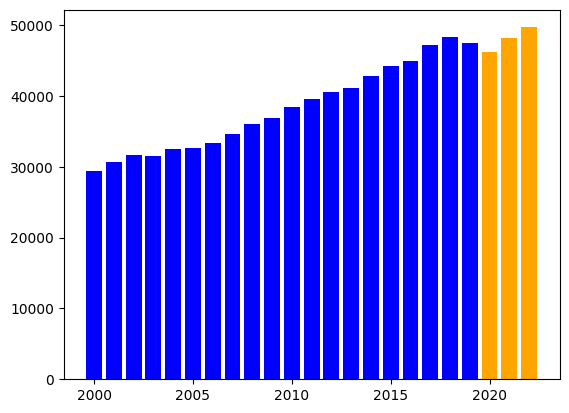

In [11]:
# YOUR CODE HERE
plt.bar(data['Year'],data['Suicides'],color='blue')
plt.bar(data1['Year'],data1['Suicides'],color = 'orange')
# Plot the total flights
# ax.plot(flight_counts['date'], flight_counts['OP_UNIQUE_CARRIER'], label='Total Flights', marker='o', linestyle='-', color='blue')

# Plot the delayed flights
# ax.plot(daily_flight_counts['date'], daily_flight_counts['is_delayed'], label='Delayed Flights', marker='o', linestyle='-', color='red')

plt.show()
# YOUR CODE ENDS HERE

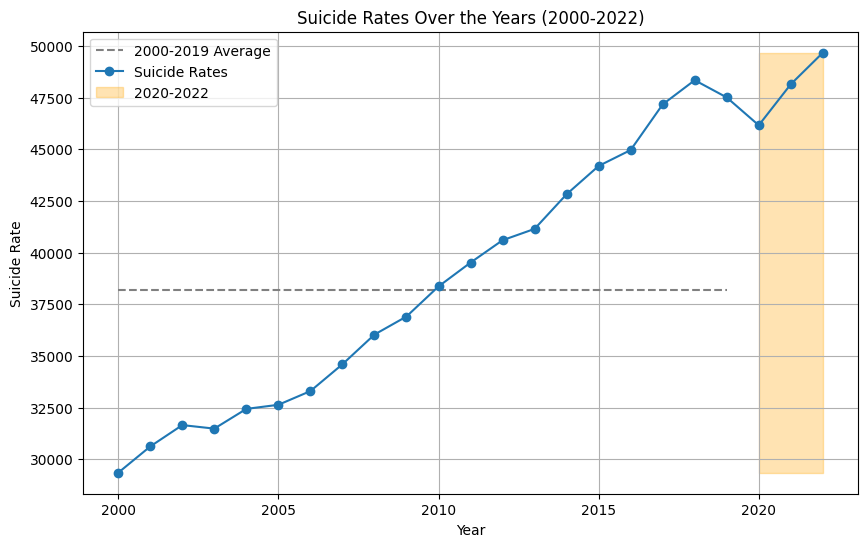

In [12]:
# Sample data
years = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
suicide_rates = [29350.0, 30622.0, 31655.0, 31484.0, 32439.0, 32637.0, 33300.0, 34598.0, 36035.0, 36909.0, 38364.0, 39518.0, 40600.0, 41149.0, 42826.0, 44193.0, 44965.0, 47173.0, 48344.0, 47511.0, 46163.0, 48148.0, 49674.0]

# Calculate average for 2000 to 2019
average_2000_to_2019 = sum(suicide_rates[:-3]) / len(suicide_rates[:-3])

plt.figure(figsize=(10, 6))

# Plot the average for 2000 to 2019
plt.plot(years[:-3], [average_2000_to_2019] * (len(years) - 3), label='2000-2019 Average', linestyle='--', color='gray')

# Plot the actual suicide rates
plt.plot(years, suicide_rates, marker='o', label='Suicide Rates')

# Shade the region for 2020 and beyond
plt.fill_between(years[-3:], min(suicide_rates), max(suicide_rates), color='orange', alpha=0.3, label='2020-2022')

plt.title('Suicide Rates Over the Years (2000-2022)')
plt.xlabel('Year')
plt.ylabel('Suicide Rate')
plt.legend()
plt.grid(True)
plt.show()

**ANSWER**
It can be clearly seen that the suicide rate was in a descedent direction in pre-Covid period and then it started again growing and arriving even upper then before.

**Q2 Is there a difference between female and male suicidal rates?**

We visualise the data on males and females suicide Rate

In [13]:
eth = pd.read_csv('ethnicity.csv')

In [14]:
ppl = pd.read_csv('people.csv')

In [15]:
det = pd.read_csv('detailed_csv.csv')

In [16]:
# eth.head(10)

In [17]:
# ppl.head()

In [18]:
# det.head()

In [19]:
male = ppl[ppl["Strata_Name"] == 'Male']
female = ppl[ppl['Strata_Name']=='Female']
Asian = eth[eth['Strata_Name']=='Asian']
Black = eth[eth['Strata_Name']=='Black']
Hispanic = eth[eth['Strata_Name']=='Hispanic']
White = eth[eth['Strata_Name']=='White']
minor = eth[eth['Strata_Name']=='Minorities']
American_raw = det[det['Strata_Name']=='American Indian/Alaska Native']
Hawai_raw = det[det['Strata_Name']=='Hawaiian/Pacific Islander']
idk_raw = det[det['Strata_Name']=='Other/Unknown']
Multi_raw = det[det['Strata_Name']=='Multi-Race']

In [20]:
# print(f"Male: {male}")

In [21]:
# print(f"idk_raw {idk_raw['Count']}")

In [22]:
# idk_raw.fillna(0, inplace=True)
# Multi_raw.fillna(0,inplace=True)
# American_raw.fillna(0,inplace=True)
# Hawai_raw.fillna(0,inplace=True)
agg_func={'Count':'sum'}
idk=idk_raw.groupby(idk_raw['Year']).aggregate(agg_func)
Multi=Multi_raw.groupby(Multi_raw['Year']).aggregate(agg_func)
Hawai=Hawai_raw.groupby(Hawai_raw['Year']).aggregate(agg_func)
American=American_raw.groupby(American_raw['Year']).aggregate(agg_func)

# idk=idk_raw.groupby('Year')['Value'].sum()
# American=American_raw.groupby('Year')['Value'].sum()
# Hawai=Hawai_raw.groupby('Year')['Value'].sum()
# Multi=Multi_raw.groupby('Year')['Value'].sum()
# display(idk)


In [23]:
# print(len(male),len(female))
# display(male)
# display(female)

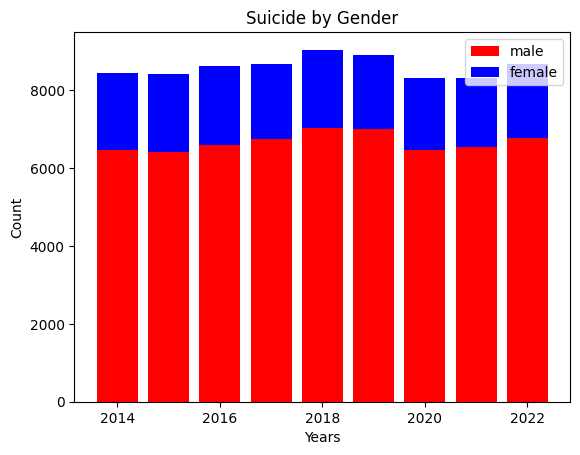

In [24]:
# plot bars in stack manner
plt.bar(male['Year'], male['Count'], color='r')
plt.bar(female['Year'], female['Count'], bottom=male['Count'], color='b')
plt.xlabel("Years")
plt.ylabel("Count")
plt.legend(["male", "female"])
plt.title("Suicide by Gender")
plt.show()

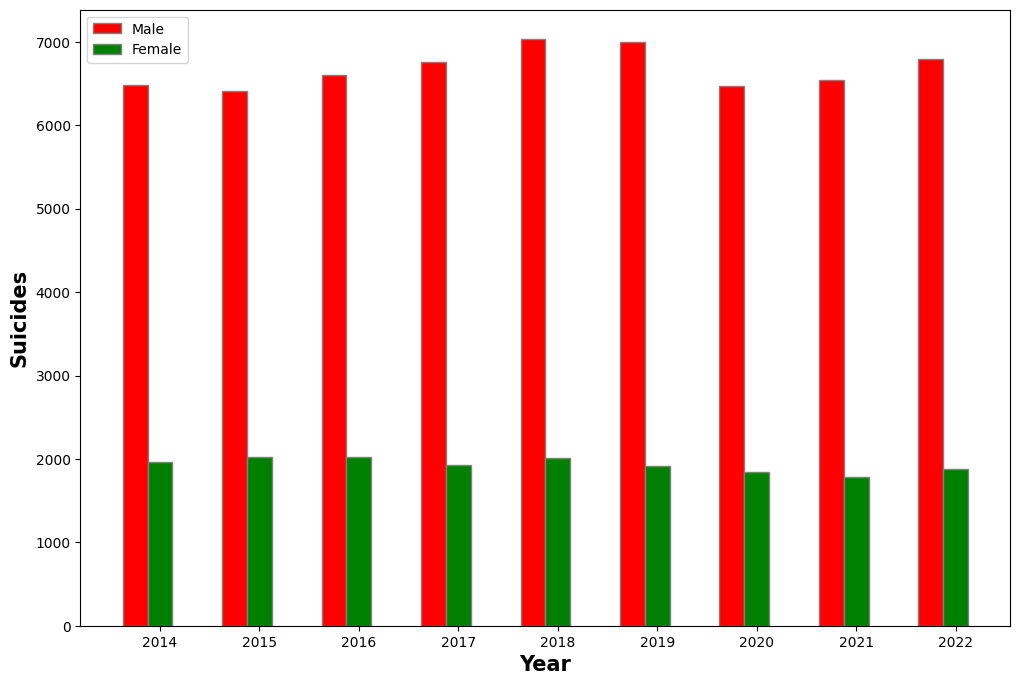

In [25]:
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8)) 
 
# set height of bar 
IT = [12, 30, 1, 8, 22] 
ECE = [28, 6, 16, 5, 10] 

 
# Set position of bar on X axis 
br1 = np.arange(len(male['Count'])) 
br2 = [x + barWidth for x in br1] 
 
# Make the plot
plt.bar(br1, male['Count'], color ='r', width = barWidth, 
        edgecolor ='grey', label ='Male') 
plt.bar(br2, female['Count'], color ='g', width = barWidth, 
        edgecolor ='grey', label ='Female') 


# Adding Xticks 
plt.xlabel('Year', fontweight ='bold', fontsize = 15) 
plt.ylabel('Suicides', fontweight ='bold', fontsize = 15) 
plt.xticks([r + barWidth for r in range(len(male['Count']))], 
        male['Year'])
 
plt.legend()
plt.show() 

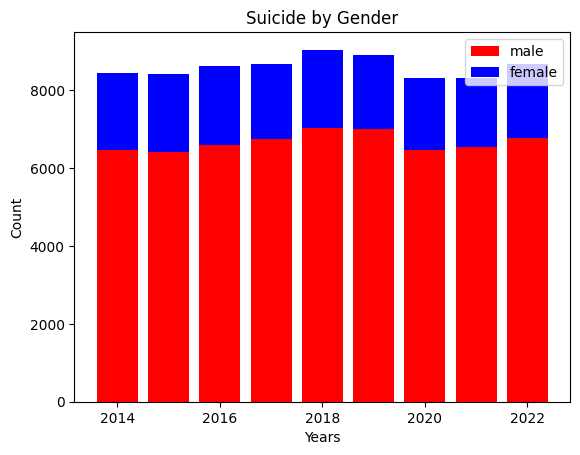

In [26]:

# plot bars in stack manner
plt.bar(male['Year'], male['Count'], color='r')
plt.bar(female['Year'], female['Count'], bottom=male['Count'], color='b')
plt.xlabel("Years")
plt.ylabel("Count")
plt.legend(["male", "female"])
plt.title("Suicide by Gender")
plt.show()

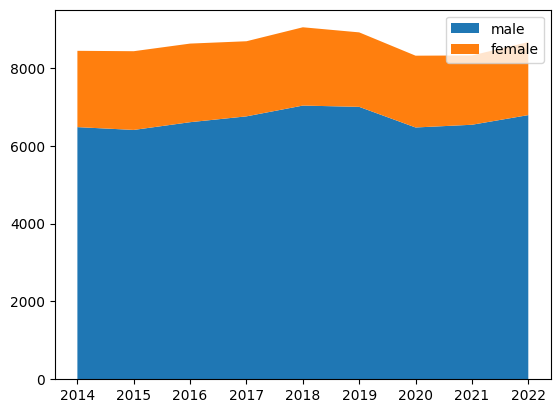

In [27]:
# make data
y = np.vstack([male['Count'], female['Count']])

# plot
fig, ax = plt.subplots()

ax.stackplot(male['Year'], y)
plt.legend(["male", "female"])

plt.show()

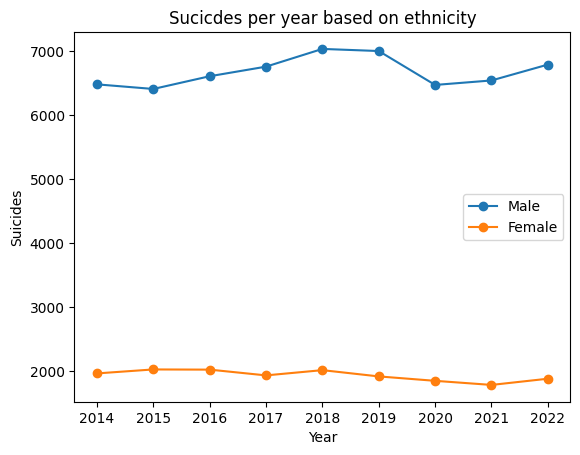

In [28]:
plt.plot(male['Year'],male['Count'],marker='o', linestyle='-',label='Male')
plt.plot(female['Year'],female['Count'],marker='o', linestyle='-',label='Female')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Suicides')
plt.title('Sucicdes per year based on ethnicity')
plt.show()


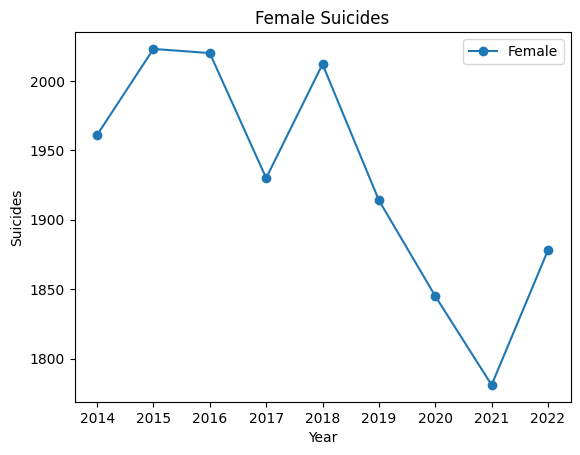

In [29]:
plt.plot(female['Year'],female['Count'],marker='o', linestyle='-',label='Female')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Suicides')
plt.title('Female Suicides')
plt.show()

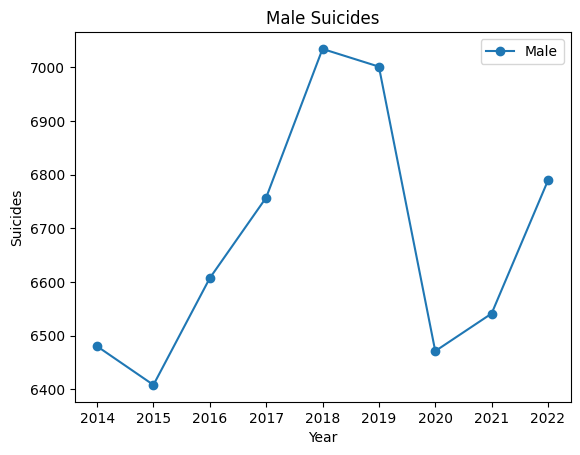

In [30]:
plt.plot(male['Year'],male['Count'],marker='o', linestyle='-',label='Male')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Suicides')
plt.title('Male Suicides')
plt.show()

**ANSWER**
Since 2014 despide growth and decresed among the suicide rate, male still were the one presenting more tedenting to suicide then females.

**Q3 Is there a difference between different race's suicidal rates?**

We visualise the data while grouping it based on ethnicity/race

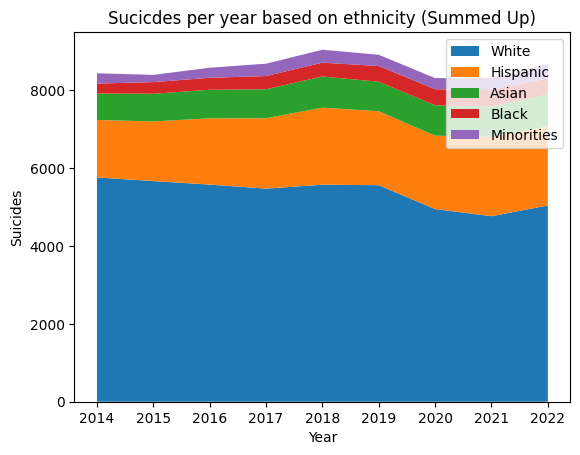

In [31]:
# make data
y = np.vstack([
               White['Count'],
               Hispanic['Count'],
                Asian['Count'],
               Black['Count'],
               minor['Count']
               ])


# plot
fig, ax = plt.subplots()

ax.stackplot(Black['Year'], y)
plt.legend([
            'White',
            'Hispanic',
            "Asian",
            'Black',
            'Minorities'
            ])
plt.xlabel('Year')
plt.ylabel('Suicides')
plt.title('Sucicdes per year based on ethnicity (Summed Up)')
plt.show()

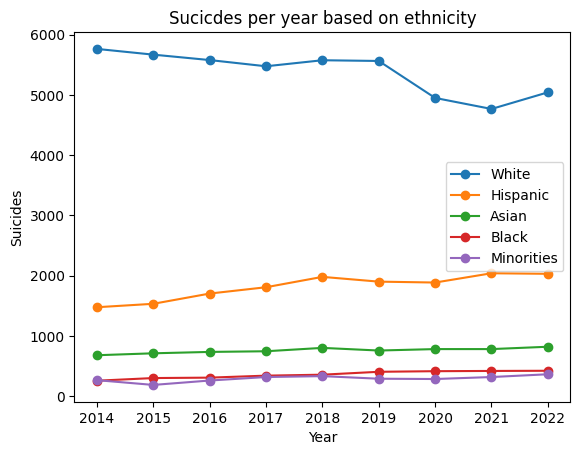

In [32]:
plt.plot(White['Year'],White['Count'],marker='o', linestyle='-',label='White')
plt.plot(Hispanic['Year'],Hispanic['Count'],marker='o', linestyle='-',label='Hispanic')
plt.plot(Asian['Year'],Asian['Count'],marker='o', linestyle='-',label='Asian')
plt.plot(Black['Year'],Black['Count'],marker='o', linestyle='-',label='Black')
plt.plot(minor['Year'],minor['Count'],marker='o', linestyle='-',label='Minorities')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Suicides')
plt.title('Sucicdes per year based on ethnicity')
plt.show()
# print(len(White['Year']))


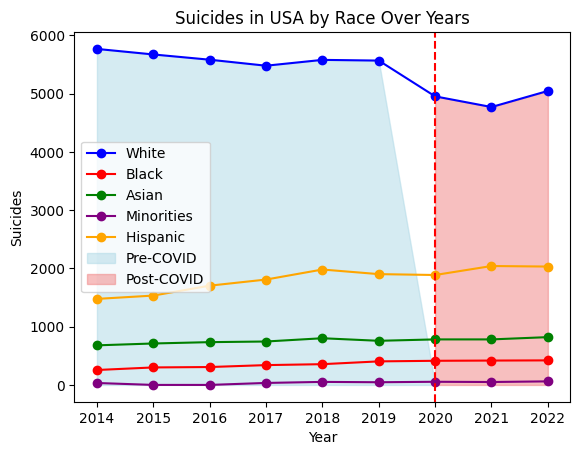

In [33]:
color_pre_covid = 'lightblue'
color_post_covid = 'lightcoral'

# Plotting different races with color differentiation
plt.plot(White['Year'], White['Count'], marker='o', linestyle='-', label='White', color='blue')
plt.plot(Black['Year'], Black['Count'], marker='o', linestyle='-', label='Black', color='red')
plt.plot(Asian['Year'], Asian['Count'], marker='o', linestyle='-', label='Asian', color='green')
plt.plot(White['Year'], idk['Count'], marker='o', linestyle='-', label='Minorities', color='purple')
plt.plot(Hispanic['Year'], Hispanic['Count'], marker='o', linestyle='-', label='Hispanic    ', color='orange')

# Fill the area before 2020 with a color
plt.fill_between(White['Year'], 0, White['Count'], where=(White['Year'] < 2020),
                 interpolate=True, color=color_pre_covid, alpha=0.5, label='Pre-COVID')

# Fill the area after 2020 with a different color
plt.fill_between(White['Year'], 0, White['Count'], where=(White['Year'] >= 2020),
                 interpolate=True, color=color_post_covid, alpha=0.5, label='Post-COVID')

# Customize the plot
plt.legend()
plt.xlabel('Year')
plt.ylabel('Suicides')
plt.title('Suicides in USA by Race Over Years')

# Highlighting the year 2020 with a red dashed line
plt.axvline(x=2020, color='red', linestyle='--', label='Year 2020')

# Show the plot
plt.show()

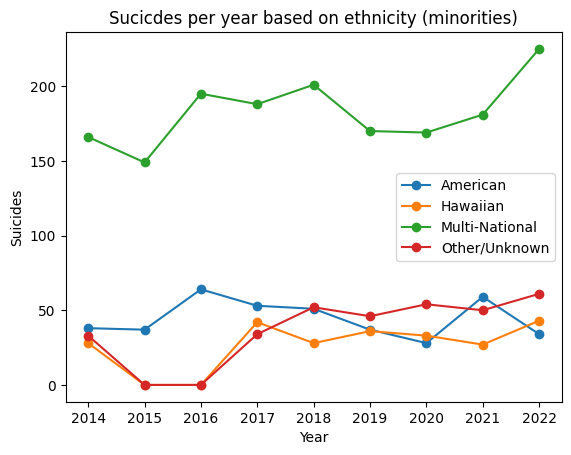

In [34]:
# print(len(American['Value']))
plt.plot(White['Year'],American['Count'],marker='o', linestyle='-',label='American')
plt.plot(White['Year'],Hawai['Count'],marker='o', linestyle='-',label='Hawaiian')
plt.plot(White['Year'],Multi['Count'],marker='o', linestyle='-',label='Multi-National')
plt.plot(White['Year'],idk['Count'],marker='o', linestyle='-',label='Other/Unknown')
# plt.plot(minor['Year'],minor['Count'],marker='o', linestyle='-',)
plt.legend()
plt.xlabel('Year')
plt.ylabel('Suicides')
plt.title('Sucicdes per year based on ethnicity (minorities)')
plt.show()

**ANSWER**
There is a clear significant differences in suicide rates across various racial groups. 
The research shows a hierarchical pattern, with white people having the greatest occurrence and hisapnic, Asian, black, and minority ethnicities following. 

**Q4 Did the Covid-19 pandemic affect more females than males? Or did the ratio between genders remain almost the same?**

Now we take into account the population of USA aswell so lets visualise population of USA based on Gender

In [35]:
eth_tot=pd.read_csv('ethincity_total.csv')

In [36]:
eth_tot.head()

Characteristic   White  Black  Asian  Minorities   Total
0            2022  251.60  45.40  20.95       15.33  333.28
1            2021  251.44  45.10  20.47       15.01  332.02
2            2020  251.64  44.91  20.23       14.78  331.56
3            2019  250.52  44.08  19.50       14.14  328.24
4            2018  249.96  43.73  19.13       13.86  326.68

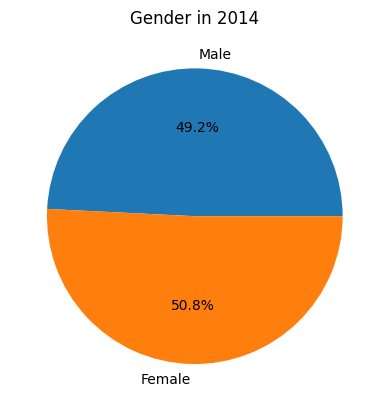

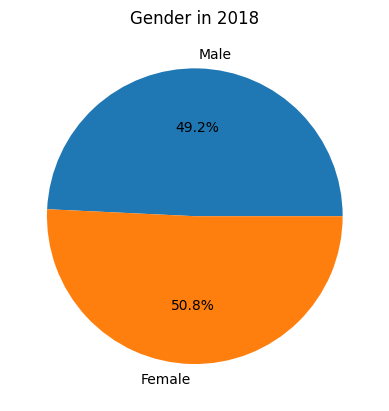

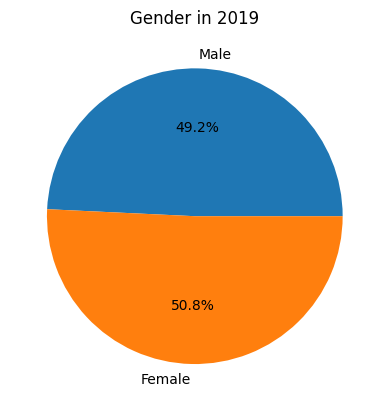

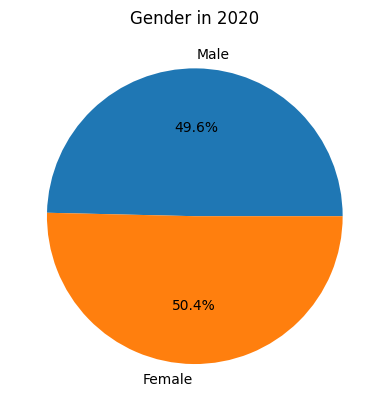

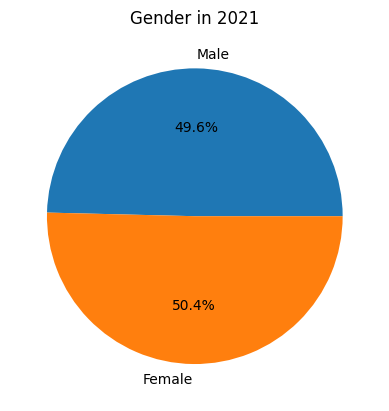

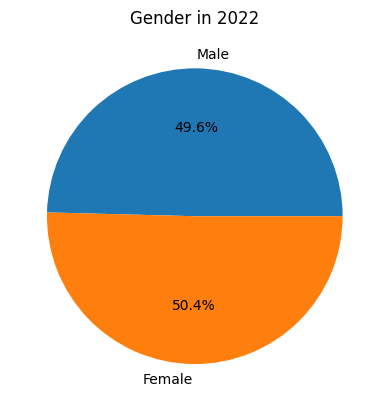

In [37]:
gen_tot=pd.read_csv('data/Gender distribution 2014-2022 - Sheet1.csv')
gen_tot2014=gen_tot.iloc[0]
labels = 'Male', 'Female'
plt.pie([gen_tot2014['Male'],gen_tot2014['Female']],labels=labels,autopct='%1.1f%%')
plt.title('Gender in 2014')
plt.show()

gen_tot2018=gen_tot.iloc[4]
labels = 'Male', 'Female'
plt.pie([gen_tot2018['Male'],gen_tot2018['Female']],labels=labels,autopct='%1.1f%%')
plt.title('Gender in 2018')
plt.show()

gen_tot2019=gen_tot.iloc[5]
labels = 'Male', 'Female'
plt.pie([gen_tot2019['Male'],gen_tot2019['Female']],labels=labels,autopct='%1.1f%%')
plt.title('Gender in 2019')
plt.show()

gen_tot2020=gen_tot.iloc[6]
labels = 'Male', 'Female'
plt.pie([gen_tot2020['Male'],gen_tot2020['Female']],labels=labels,autopct='%1.1f%%')
plt.title('Gender in 2020')
plt.show()

gen_tot2021=gen_tot.iloc[7]
labels = 'Male', 'Female'
plt.pie([gen_tot2021['Male'],gen_tot2021['Female']],labels=labels,autopct='%1.1f%%')
plt.title('Gender in 2021')
plt.show()

gen_tot2022=gen_tot.iloc[-1]
labels = 'Male', 'Female'
plt.pie([gen_tot2022['Male'],gen_tot2022['Female']],labels=labels,autopct='%1.1f%%')
plt.title('Gender in 2022')
plt.show()



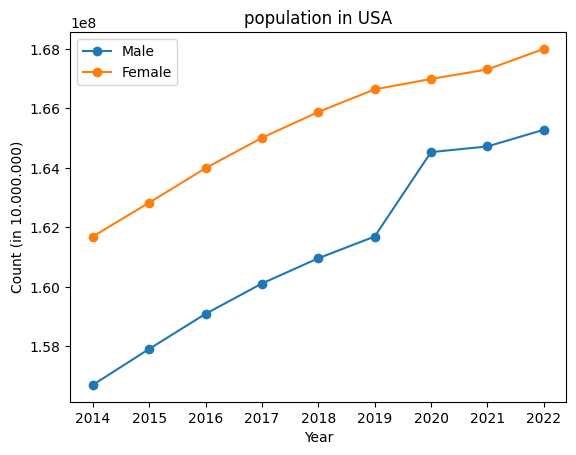

Unnamed: 0       Male     Female
0        2014  156700000  161690000
1        2015  157910000  162830000
2        2016  159090000  163990000
3        2017  160110000  165010000
4        2018  160960000  165880000
5        2019  161690000  166640000
6        2020  164530000  166990000
7        2021  164720000  167310000
8        2022  165280000  168000000

In [38]:
# print(len(American['Value']))
plt.plot(gen_tot['Unnamed: 0'],gen_tot['Male'],marker='o', linestyle='-',label='Male')
plt.plot(gen_tot['Unnamed: 0'],gen_tot['Female'],marker='o', linestyle='-',label='Female')
# plt.plot(gen_tot['Unnamed: 0'],gen_tot['Asian'],marker='o', linestyle='-',label='Asian')
# plt.plot(gen_tot['Unnamed: 0'],gen_tot['Minorities'],marker='o', linestyle='-',label='Minorities')
# plt.plot(minor['Year'],minor['Count'],marker='o', linestyle='-',)
plt.legend()
plt.xlabel('Year')
plt.ylabel('Count (in 10.000.000)')
plt.title('population in USA')
plt.show()
display(gen_tot)

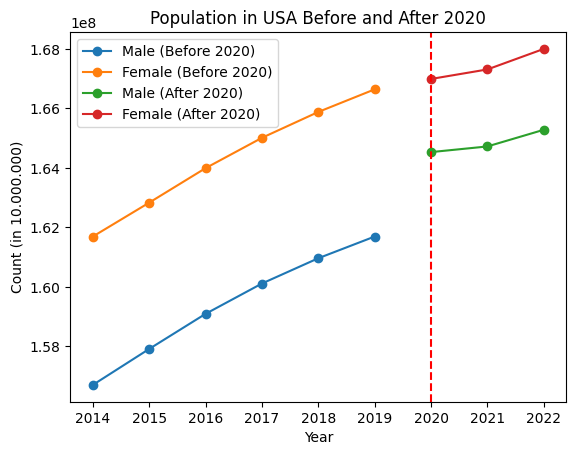

In [39]:
# Extracting data before and after 2020
before_2020 = gen_tot[gen_tot['Unnamed: 0'] < 2020]
after_2020 = gen_tot[gen_tot['Unnamed: 0'] >= 2020]

# Plotting before 2020
plt.plot(before_2020['Unnamed: 0'], before_2020['Male'], marker='o', linestyle='-', label='Male (Before 2020)')
plt.plot(before_2020['Unnamed: 0'], before_2020['Female'], marker='o', linestyle='-', label='Female (Before 2020)')

# Plotting after 2020
plt.plot(after_2020['Unnamed: 0'], after_2020['Male'], marker='o', linestyle='-', label='Male (After 2020)')
plt.plot(after_2020['Unnamed: 0'], after_2020['Female'], marker='o', linestyle='-', label='Female (After 2020)')

# Customize the plot
plt.legend()
plt.xlabel('Year')
plt.ylabel('Count (in 10.000.000)')
plt.title('Population in USA Before and After 2020')
plt.axvline(x=2020, color='red', linestyle='--', label='Year 2020')

# Show the plot
plt.show()

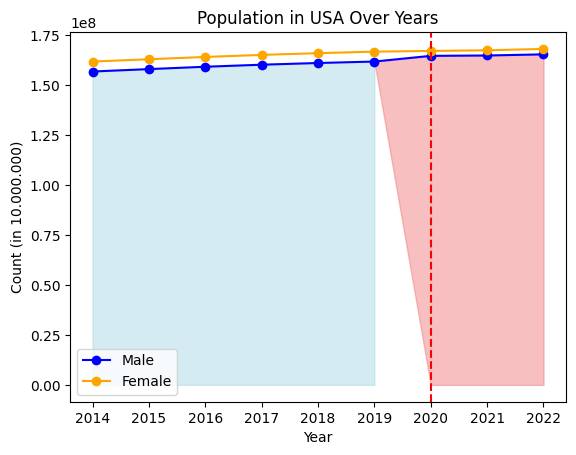

In [40]:
# Plotting the data
plt.plot(gen_tot['Unnamed: 0'], gen_tot['Male'], marker='o', linestyle='-', label='Male', color='blue')
plt.plot(gen_tot['Unnamed: 0'], gen_tot['Female'], marker='o', linestyle='-', label='Female', color='orange')

# Customize the plot
plt.legend()
plt.xlabel('Year')
plt.ylabel('Count (in 10.000.000)')
plt.title('Population in USA Over Years')

# Highlighting the year 2020 with a red dashed line
plt.axvline(x=2020, color='red', linestyle='--', label='Year 2020')

# Color differentiation for before and after 2020
plt.fill_between(gen_tot['Unnamed: 0'], gen_tot['Male'], where=(gen_tot['Unnamed: 0'] < 2020),
                 interpolate=True, color='lightblue', alpha=0.5, label='Before 2020')
plt.fill_between(gen_tot['Unnamed: 0'], gen_tot['Male'], where=(gen_tot['Unnamed: 0'] >= 2020),
                 interpolate=True, color='lightcoral', alpha=0.5, label='After 2020')

# Show the plot
plt.show()

Now We normalise the data so we Calulcate the sucidie rate per gender (by dividing amount of sucidies in certain year by the populaiton that year)

In [41]:
gender_distribution = pd.read_csv('data/Gender distribution 2014-2022 - Sheet1.csv')
suicide_data = pd.read_csv('people.csv')

# Rearrange the second table
suicide_data_rearranged = suicide_data.pivot(index='Year', columns='Strata_Name', values='Count').reset_index()

# Create a new table with calculated suicide rates per population
suicide_rates_per_population = pd.DataFrame()

suicide_rates_per_population['Year'] = suicide_data_rearranged['Year']
suicide_rates_per_population['Male'] = suicide_data_rearranged['Male'] / gender_distribution['Male']
suicide_rates_per_population['Female'] = suicide_data_rearranged['Female'] / gender_distribution['Female']

# Display the rearranged table
print("Rearranged Suicide Data:")
print(suicide_data_rearranged)

# Display the new table with calculated suicide rates per population
print("\nSuicide Rates per Population:")
print(suicide_rates_per_population)

Rearranged Suicide Data:
Strata_Name  Year  Female    Male
0            2014  1961.0  6480.0
1            2015  2023.0  6408.0
2            2016  2020.0  6607.0
3            2017  1930.0  6757.0
4            2018  2012.0  7034.0
5            2019  1914.0  7001.0
6            2020  1845.0  6471.0
7            2021  1781.0  6541.0
8            2022  1878.0  6789.0

Suicide Rates per Population:
   Year      Male    Female
0  2014  0.000041  0.000012
1  2015  0.000041  0.000012
2  2016  0.000042  0.000012
3  2017  0.000042  0.000012
4  2018  0.000044  0.000012
5  2019  0.000043  0.000011
6  2020  0.000039  0.000011
7  2021  0.000040  0.000011
8  2022  0.000041  0.000011


In [42]:
gender_distribution = pd.read_csv('data/Gender distribution 2014-2022 - Sheet1.csv')
suicide_data = pd.read_csv('people.csv')

# Rearrange the second table
suicide_data_rearranged = suicide_data.pivot(index='Year', columns='Strata_Name', values='Count').reset_index()

# Create a new table with calculated suicide rates per population
suicide_rates_per_population = pd.DataFrame()

suicide_rates_per_population['Year'] = suicide_data_rearranged['Year']
suicide_rates_per_population['Male'] = suicide_data_rearranged['Male'] / gender_distribution['Male']
suicide_rates_per_population['Female'] = suicide_data_rearranged['Female'] / gender_distribution['Female']

# Display the rearranged table
print("Rearranged Suicide Data:")
print(suicide_data_rearranged)

# Display the new table with calculated suicide rates per population
print("\nSuicide Rates per Population:")
print(suicide_rates_per_population)

Rearranged Suicide Data:
Strata_Name  Year  Female    Male
0            2014  1961.0  6480.0
1            2015  2023.0  6408.0
2            2016  2020.0  6607.0
3            2017  1930.0  6757.0
4            2018  2012.0  7034.0
5            2019  1914.0  7001.0
6            2020  1845.0  6471.0
7            2021  1781.0  6541.0
8            2022  1878.0  6789.0

Suicide Rates per Population:
   Year      Male    Female
0  2014  0.000041  0.000012
1  2015  0.000041  0.000012
2  2016  0.000042  0.000012
3  2017  0.000042  0.000012
4  2018  0.000044  0.000012
5  2019  0.000043  0.000011
6  2020  0.000039  0.000011
7  2021  0.000040  0.000011
8  2022  0.000041  0.000011


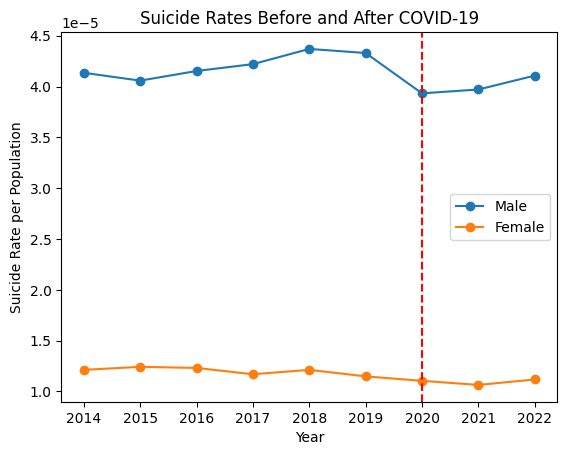

In [43]:
# Plotting the difference before and after COVID-19
plt.plot(suicide_rates_per_population['Year'], suicide_rates_per_population['Male'], marker='o', linestyle='-', label='Male')
plt.plot(suicide_rates_per_population['Year'], suicide_rates_per_population['Female'], marker='o', linestyle='-', label='Female')

# Customize the plot
plt.legend()
plt.xlabel('Year')
plt.ylabel('Suicide Rate per Population')
plt.title('Suicide Rates Before and After COVID-19')

# Highlighting the year 2020 with a red dashed line
plt.axvline(x=2020, color='red', linestyle='--', label='Year 2020')

# Show the plot
plt.show()

**ANSWER**
The ratio for female before and after covid continues to remain the same , in a pretty linear distribution. 

At males distribution we can see a difference of pre and post Covid due to the fact that the number of suicides was on the decresing trend and once the pandemic came it started again to increase but did not reach the number of suicide rate as before the fall of male suicide rate.

The ration between gender stick the same by having more males then female suicide, despite the fact that taking in account the population in the USA there were more famlaes then mens.



**Q5 Did the Covid-19 pandemic affect different races more specifically? Or did the ratio between races remain almost the same?**

Now we also calulate the rates for different ethnicities (the same way as in Gender). 
Therefore, we first visualise the population and then calculate the rates.

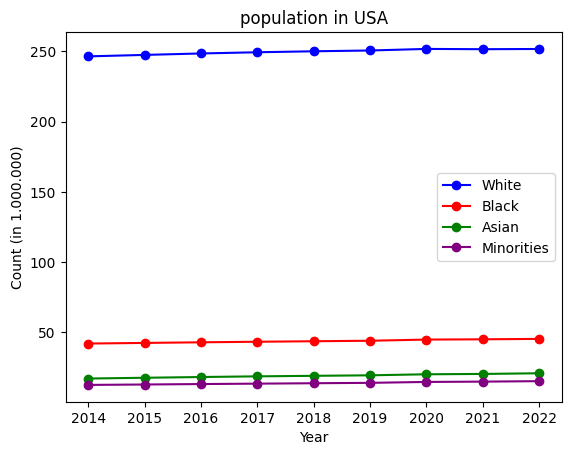

In [44]:
# print(len(American['Value']))
plt.plot(eth_tot['Characteristic'], eth_tot['White'], marker='o', linestyle='-', label='White', color='blue')
plt.plot(eth_tot['Characteristic'], eth_tot['Black'], marker='o', linestyle='-', label='Black', color='red')
plt.plot(eth_tot['Characteristic'], eth_tot['Asian'], marker='o', linestyle='-', label='Asian', color='green')
plt.plot(eth_tot['Characteristic'], eth_tot['Minorities'], marker='o', linestyle='-', label='Minorities', color='purple')

# plt.plot(minor['Year'],minor['Count'],marker='o', linestyle='-',)
plt.legend()
plt.xlabel('Year')
plt.ylabel('Count (in 1.000.000)')
plt.title('population in USA')
plt.show()

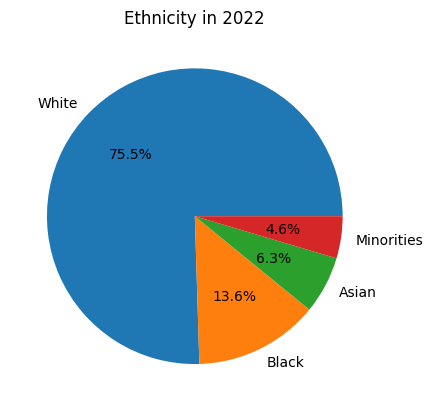

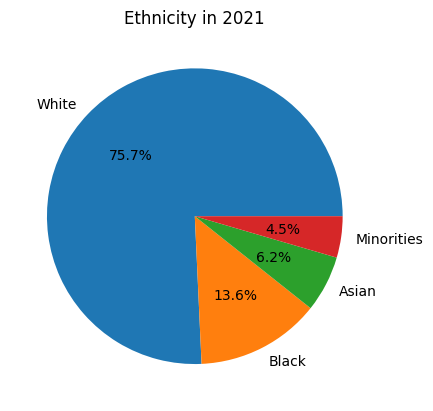

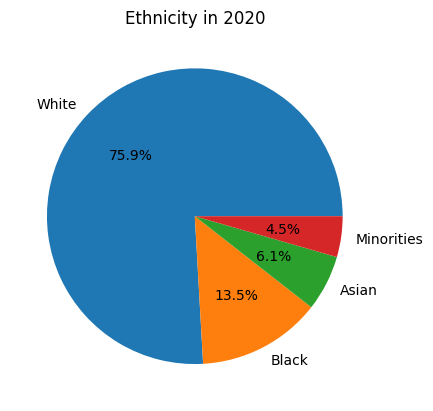

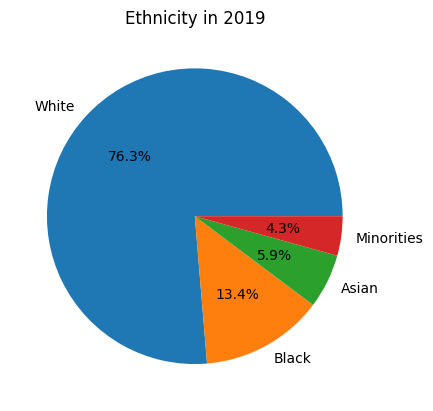

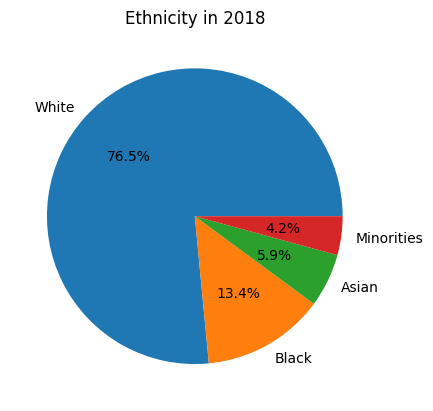

In [45]:
eth_tot2022=eth_tot.iloc[0]
# display(eth_tot)
# display(eth_tot2022)
labels = 'White', 'Black', 'Asian', 'Minorities'
plt.pie(eth_tot2022[1:-1],labels=labels,autopct='%1.1f%%')
plt.title('Ethnicity in 2022')


plt.show()
eth_tot2021=eth_tot.iloc[1]

labels = 'White', 'Black', 'Asian', 'Minorities'
plt.pie(eth_tot2021[1:-1],labels=labels,autopct='%1.1f%%')
plt.title('Ethnicity in 2021')
plt.show()

eth_tot2020=eth_tot.iloc[2]
labels = 'White', 'Black', 'Asian', 'Minorities'
plt.pie(eth_tot2020[1:-1],labels=labels,autopct='%1.1f%%')
plt.title('Ethnicity in 2020')
plt.show()

eth_tot2019=eth_tot.iloc[3]
# display(eth_tot2019[1:-1])
# labels = 'White', 'Black', 'Asian', 'Minorities'
plt.pie(eth_tot2019[1:-1],labels=labels,autopct='%1.1f%%')
plt.title('Ethnicity in 2019')
plt.show()

eth_tot2018=eth_tot.iloc[4]
labels = 'White', 'Black', 'Asian', 'Minorities'
plt.pie(eth_tot2018[1:-1],labels=labels,autopct='%1.1f%%')
plt.title('Ethnicity in 2018')
plt.show()

# eth_tot2014=eth_tot.iloc[-1]
# # display(eth_tot2019[1:-1])
# # labels = 'White', 'Black', 'Asian', 'Minorities'
# plt.pie(eth_tot2014[1:-1],labels=labels,autopct='%1.1f%%')
# plt.title('Ethnicity in 2014')

In [46]:
# Load the datasets
suicide_data_ethnicity = pd.read_csv('ethnicity.csv')
population_data_ethnicity = pd.read_csv('ethincity_total.csv')

# Recreate the first table
suicide_data_ethnicity_rearranged = suicide_data_ethnicity.pivot(index='Year', columns='Strata_Name', values='Count').reset_index()

# Create a new table with calculated suicide rates per population for each race
suicide_rates_per_race = pd.DataFrame()
suicide_rates_per_race['Year'] = suicide_data_ethnicity_rearranged['Year']

# Calculate suicide rates per population for each race
for race in ['White', 'Black', 'Asian', 'Minorities']:
    suicide_rates_per_race[race] = suicide_data_ethnicity_rearranged[race] / population_data_ethnicity[race]

# Display the recreated first table
print("Recreated Ethnicity Suicide Data:")
print(suicide_data_ethnicity_rearranged)

# Display the new table with calculated suicide rates per population for each race
print("\nSuicide Rates per Population for Each Race:")
print(suicide_rates_per_race)

Recreated Ethnicity Suicide Data:
Strata_Name  Year  Asian  Black  Hispanic  Minorities   White
0            2014  679.0  256.0    1476.0       265.0  5765.0
1            2015  711.0  300.0    1533.0       186.0  5670.0
2            2016  734.0  307.0    1703.0       259.0  5580.0
3            2017  745.0  340.0    1808.0       317.0  5477.0
4            2018  801.0  356.0    1980.0       332.0  5577.0
5            2019  757.0  404.0    1901.0       289.0  5565.0
6            2020  781.0  414.0    1886.0       284.0  4951.0
7            2021  781.0  418.0    2040.0       317.0  4768.0
8            2022  820.0  421.0    2031.0       363.0  5044.0

Suicide Rates per Population for Each Race:
   Year      White      Black      Asian  Minorities
0  2014  22.913355   5.638767  32.410501   17.286367
1  2015  22.550111   6.651885  34.733757   12.391739
2  2016  22.174535   6.835894  36.282748   17.523681
3  2017  21.862526   7.713249  38.205128   22.418670
4  2018  22.311570   8.140864  41.87

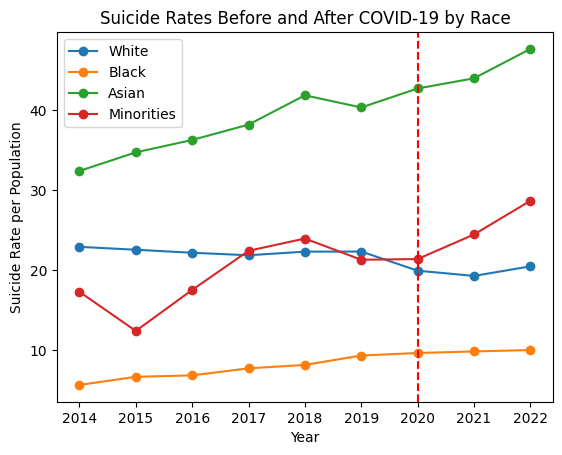

In [47]:
# Plotting the difference before and after COVID-19
plt.plot(suicide_rates_per_race['Year'], suicide_rates_per_race['White'], marker='o', linestyle='-', label='White')
plt.plot(suicide_rates_per_race['Year'], suicide_rates_per_race['Black'], marker='o', linestyle='-', label='Black')
plt.plot(suicide_rates_per_race['Year'], suicide_rates_per_race['Asian'], marker='o', linestyle='-', label='Asian')
plt.plot(suicide_rates_per_race['Year'], suicide_rates_per_race['Minorities'], marker='o', linestyle='-', label='Minorities')

# Customize the plot
plt.legend()
plt.xlabel('Year')
plt.ylabel('Suicide Rate per Population')
plt.title('Suicide Rates Before and After COVID-19 by Race')

# Highlighting the year 2020 with a red dashed line
plt.axvline(x=2020, color='red', linestyle='--', label='Year 2020')

# Show the plot
plt.show()

**ASNWER** 
We interestingly found out that when the numbers are normalised to take into consideration the population proportions of each racial group, a more complex picture becomes apparent. When population disparities are taken into account, Asian people are the most negatively impacted racial group, followed by white people, minorities,  and finally black people.

With that we can say that the pandemic increased the suicide rate for all races, but the biggest difference can be seen in minorities and asian which present a noticeable escalation in numbers.